**Summary:** Reproduce figures from BLISS paper related to the galaxy autoencoder.

In [38]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [39]:
%matplotlib inline

In [40]:
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from bliss import plotting
from bliss.models import galaxy_net

In [41]:
from plot_defaults import *

In [42]:
# load galsim images from `SDSSGalaxies` data module. 
# TODO: How to reproduce? 
data = torch.load('../../../output/sdss_simulated_galaxies_figures.pt')
images = data['images']
noiseless = data['noiseless'].numpy()
background = data['background'].reshape(1, 1, 53, 53)

In [43]:
# load model 
model_path = '../../../models/sdss_autoencoder.ckpt'
# model_path ='../../../output/sdss_autoencoder8/version_3/checkpoints/epoch=969-val_loss=781677.125.ckpt'
auto_encoder = galaxy_net.OneCenteredGalaxyAE.load_from_checkpoint('../../../models/sdss_autoencoder.ckpt').eval()
assert not auto_encoder.training

In [44]:
# get reconstructions and residuals
recon_mean = auto_encoder.forward(images, background).detach()
residuals = (images - recon_mean) / torch.sqrt(recon_mean)

# Autoencoder Performance Figures

In [45]:
mpl.rcParams.update(
    {
        # figure
        "figure.figsize": (10, 10),
        # axes
        "axes.labelsize": 24,
        "axes.titlesize": 28,
        # ticks
        "xtick.major.size": 7,
        "xtick.minor.size": 4,
        "xtick.major.width": 0.8,
        "xtick.minor.width": 0.6,
        "xtick.labelsize": 20,
        "ytick.major.size": 7,
        "ytick.minor.size": 6,
        "ytick.major.width": 0.8,
        "ytick.minor.width": 0.6,
        "ytick.labelsize": 20,
        # legend
        "legend.fontsize": 18,
    }
)

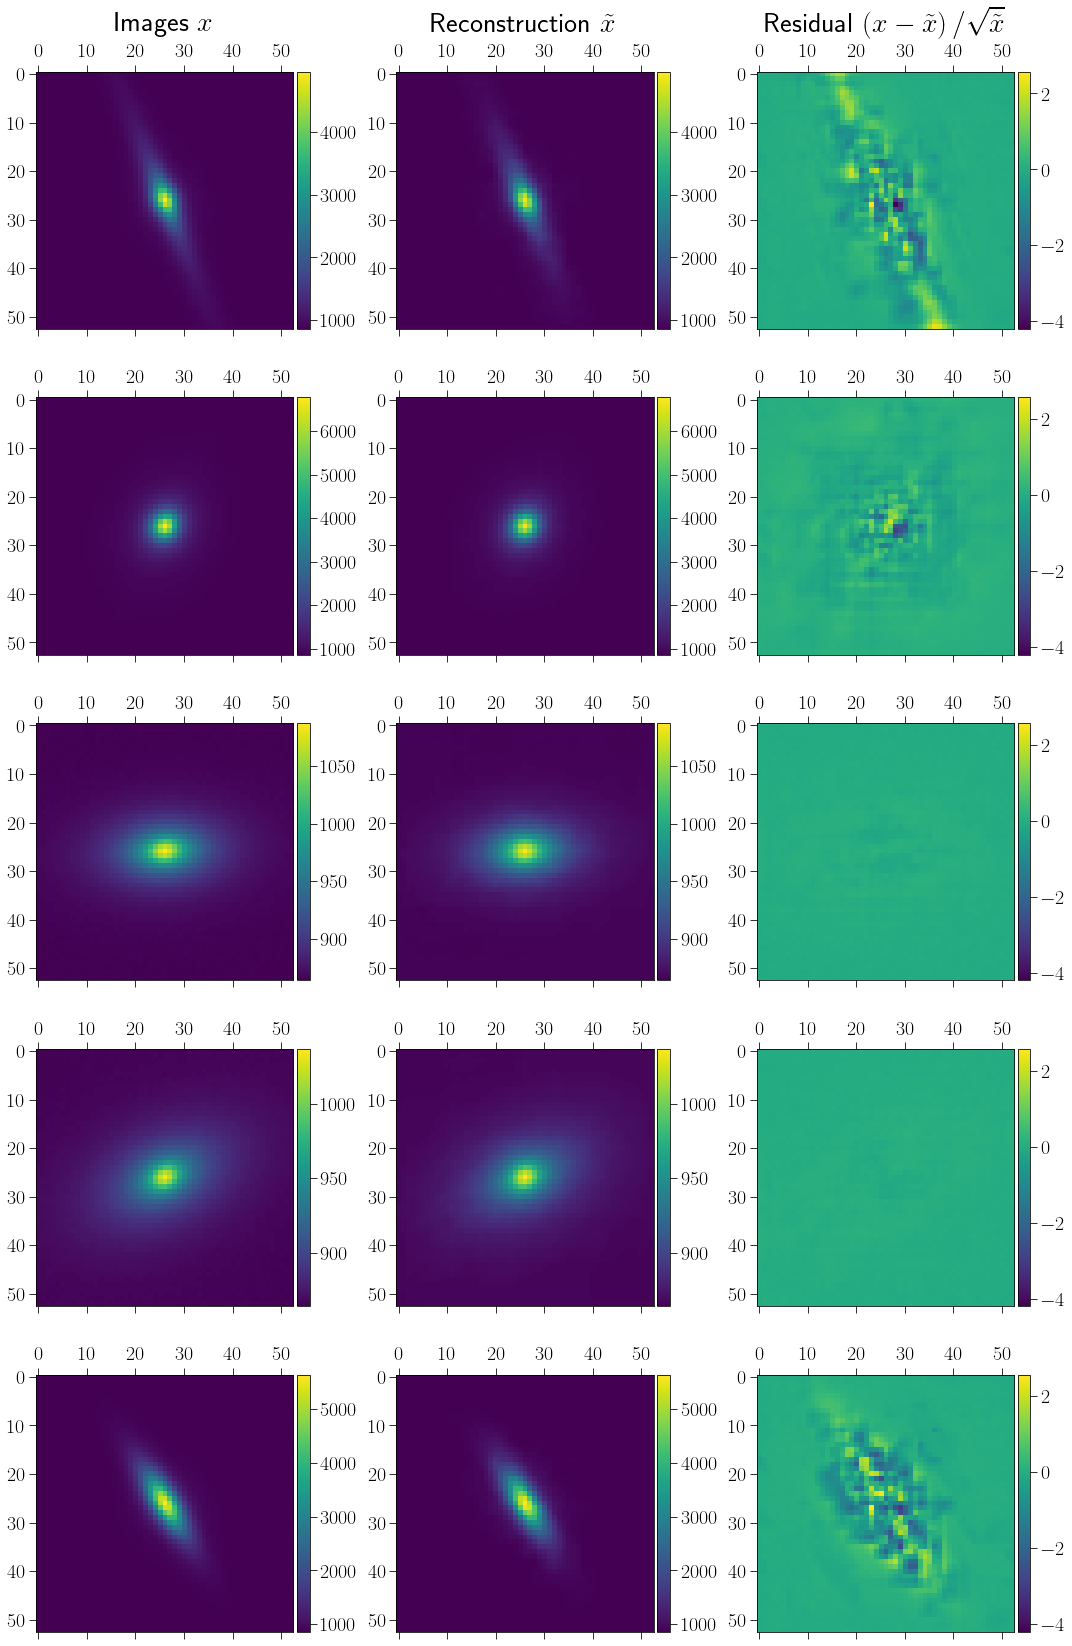

In [46]:
fig = auto_encoder.plot_reconstruction(images, recon_mean, residuals, mode='random', width=15, pad=12., 
                                       n_examples=5)
plt.subplots_adjust(hspace=-0.20)

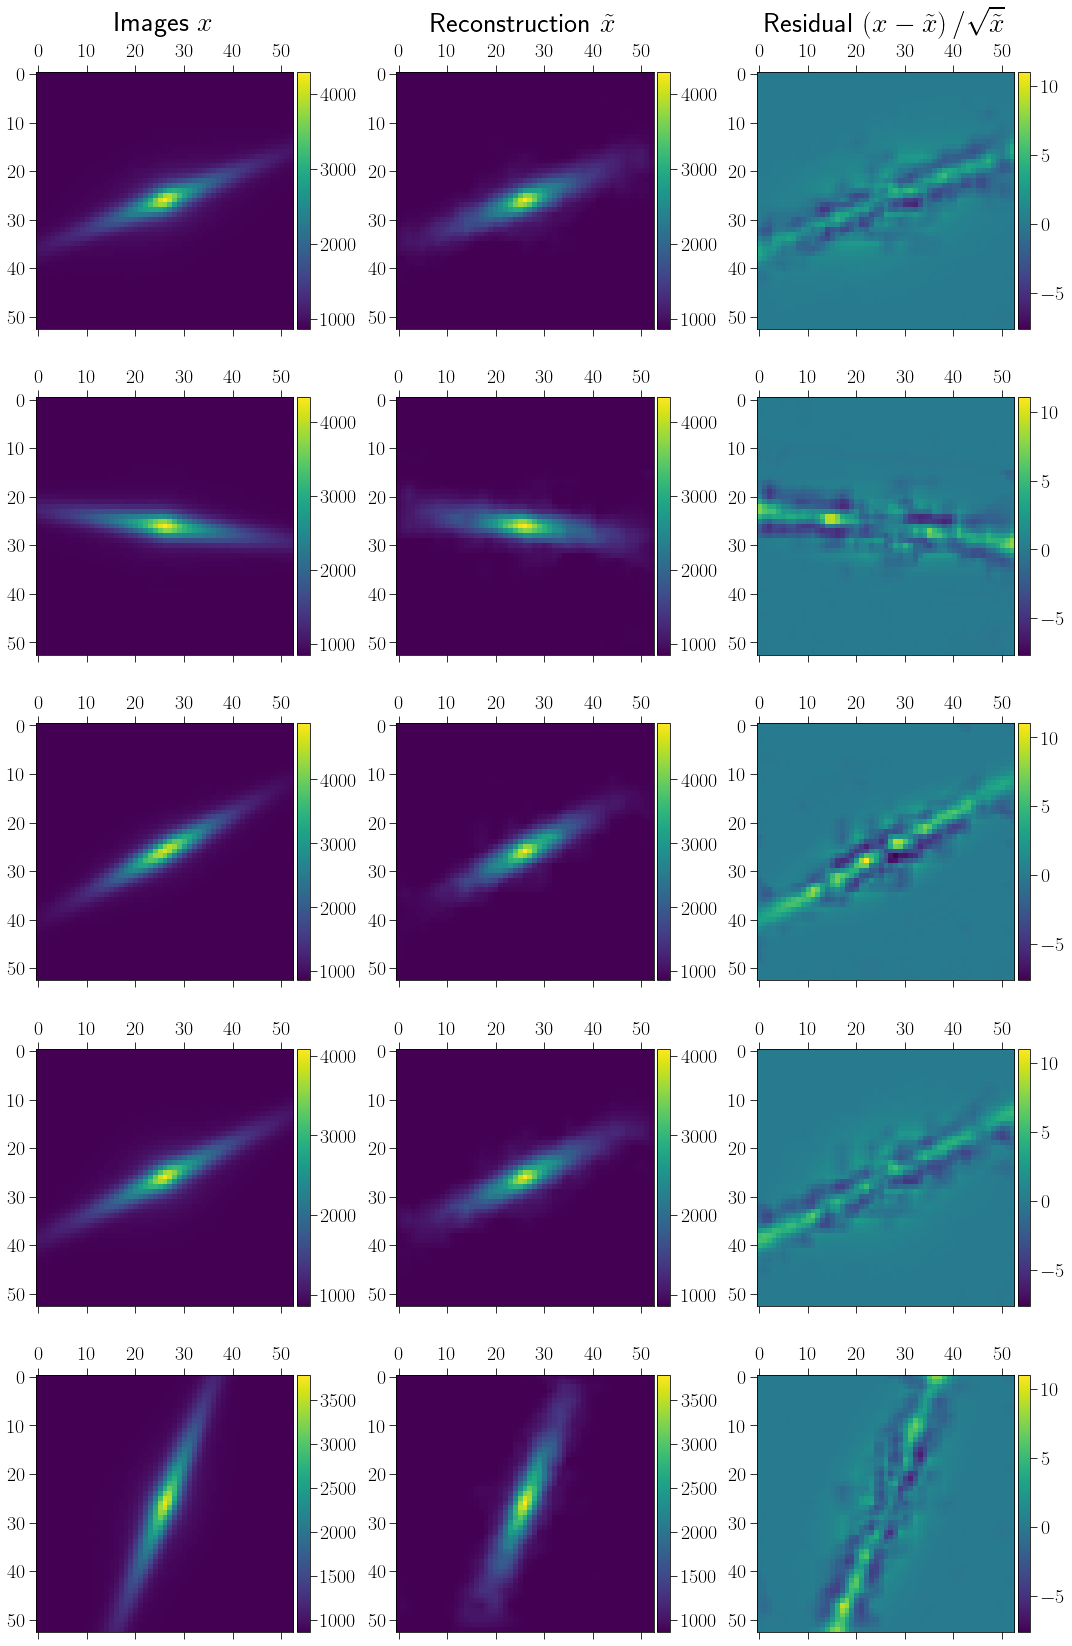

In [63]:
fig = auto_encoder.plot_reconstruction(images, recon_mean, residuals, mode='worst', width=15, pad=12., 
                                       n_examples=5)
plt.subplots_adjust(hspace=-0.20)

# Single galaxy metrics